### Import Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from data_pipeline import transformation_pipeline
from sklearn.model_selection import train_test_split
import tensorflow as tf

### Data Reading

In [3]:
data = pd.read_csv('D:/Downloads/final-year-project/data/preprocessed_train_data.csv')

### Creating a pipeline object and cleaning data

In [4]:
pipeline, data_cleaned = transformation_pipeline(
    data, building_id=122, meter=0, primary_use=99)

d:\Downloads\final-year-project\notebooks\data_fetcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['building_id', 'meter', 'primary_use'],
d:\Downloads\final-year-project\notebooks\data_fetcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "timestamp"] = pd.to_datetime(df.loc[:, "timestamp"])
d:\Downloads\final-year-project\notebooks\data_fetcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

### Transforming the data and showing it

In [5]:
transformed_data = pipeline.fit_transform(data_cleaned)
tmp_cols=['meter_reading','square_feet','air_temperature','dew_temperature','sea_level_pressure','wind_direction','wind_speed', 'day','month','hour','season','weekend','day_of_the_week']
display(pd.DataFrame(transformed_data, index=data_cleaned.index,
        columns=tmp_cols).head())

,meter_reading,square_feet,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed,day,month,hour,season,weekend,day_of_the_week
timestamp,,,,,,,,,,,,,
2016-01-01 00:00:00,0.000000,0.209239,0.381757,0.659280,0.666667,0.167568,0.0,1.0,1.0,0.0,3.0,0.0,4.0
2016-01-01 01:00:00,0.364635,0.206522,0.381757,0.668975,0.638889,0.140541,0.0,1.0,1.0,1.0,3.0,0.0,4.0
2016-01-01 02:00:00,0.369028,0.176630,0.364865,0.673130,0.000000,0.000000,0.0,1.0,1.0,2.0,3.0,0.0,4.0
2016-01-01 03:00:00,0.366282,0.160326,0.341216,0.678670,0.472222,0.081081,0.0,1.0,1.0,3.0,3.0,0.0,4.0
2016-01-01 04:00:00,0.366557,0.168478,0.361486,0.684211,0.305556,0.081081,0.0,1.0,1.0,4.0,3.0,0.0,4.0


### Displaying the Meter Reading


In [6]:
display(transformed_data[:, 0])  # this gives us the meter reading

array([0.        , 0.36463482, 0.36902801, ..., 0.2800659 , 0.27594728,
       0.27841845])

### Showing the rest of the data

In [7]:
display(transformed_data[:, 1:])  # this gives us the rest of the columns

array([[0.20923913, 0.38175676, 0.65927978, ..., 3.        , 0.        ,
        4.        ],
       [0.20652174, 0.38175676, 0.66897507, ..., 3.        , 0.        ,
        4.        ],
       [0.17663043, 0.36486486, 0.67313019, ..., 3.        , 0.        ,
        4.        ],
       ...,
       [0.29347826, 0.49662162, 0.73268698, ..., 3.        , 1.        ,
        5.        ],
       [0.29347826, 0.51013514, 0.72160665, ..., 3.        , 1.        ,
        5.        ],
       [0.30978261, 0.52027027, 0.71191136, ..., 3.        , 1.        ,
        5.        ]])

### Data Splitting

In [8]:
x_train, x_val, y_train, y_val = train_test_split(transformed_data[:, 1:],
                                                  transformed_data[:, 0],
                                                  test_size=0.2,
                                                  shuffle=False,
                                                  random_state=2021)

### Creating time series data generators

In [9]:
train_gen = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_train,
                                                                y_train,
                                                                length=6, sampling_rate=1,
                                                                stride=1, batch_size=32
                                                                )

val_gen = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_val,
                                                              y_val,
                                                              length=6, sampling_rate=1,
                                                              stride=1, batch_size=32
                                                              )

### Creating Model

In [10]:
model = tf.keras.Sequential([tf.keras.layers.GRU(128, activation='relu',
                                                 return_sequences=False),
                            tf.keras.layers.Dense(1)])

### Training Model

In [11]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.0001))

cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      patience=15,
                                      restore_best_weights=True)

### Fitting Model

In [12]:
history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=100,
                    callbacks=[cb],
                    shuffle=False)

Epoch 1/100
219/219 [==============================] - 3s 6ms/step - loss: 0.0674 - val_loss: 0.0224
Epoch 2/100
219/219 [==============================] - 1s 5ms/step - loss: 0.0219 - val_loss: 0.0171
Epoch 3/100
219/219 [==============================] - 1s 5ms/step - loss: 0.0176 - val_loss: 0.0128
Epoch 4/100
219/219 [==============================] - 1s 5ms/step - loss: 0.0145 - val_loss: 0.0098
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0119 - val_loss: 0.0079
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0099 - val_loss: 0.0075
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0087 - val_loss: 0.0090
Epoch 8/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0079 - val_loss: 0.0168
Epoch 9/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0080 - val_loss: 0.0347
Epoch 10/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0086 - val_lo

### Model Performance (Before Tuning)

In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Helper function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Helper function to calculate SMAPE
def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Assuming you have the generators `train_gen` and `val_gen`
y_true_val = np.concatenate([y for x, y in val_gen], axis=0)
y_pred_val = model.predict(val_gen).flatten()

mse = mean_squared_error(y_true_val, y_pred_val)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true_val, y_pred_val)
mape = mean_absolute_percentage_error(y_true_val, y_pred_val)
smape = symmetric_mean_absolute_percentage_error(y_true_val, y_pred_val)
forecast_bias = np.mean(y_pred_val - y_true_val)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'SMAPE: {smape}')
print(f'Forecast Bias: {forecast_bias}')


55/55 [==============================] - 0s 1ms/step
MSE: 0.005533587541127396
RMSE: 0.07438808736032534
MAE: 0.058665499897949336
MAPE: 17.005248671383125
SMAPE: 17.721885222708465
Forecast Bias: -0.007766111466303883


In [18]:
import tensorflow as tf
from kerastuner.tuners import RandomSearch

# 2 Versions: fyp and fyp 1

def build_model(hp):
    model = tf.keras.Sequential()

    # Adding multiple GRU layers
    for i in range(hp.Int('num_gru_layers', 1, 3)):
        model.add(tf.keras.layers.GRU(
            units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
            activation=hp.Choice('activation', values=['relu', 'tanh']),
            return_sequences=(i < hp.get('num_gru_layers') - 1),  # Only the last GRU layer should return sequences=False
            dropout=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1),
            recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.0, max_value=0.5, step=0.1)
        ))

    model.add(tf.keras.layers.Dense(1))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='mse'
    )
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    directory='hyperparameter_tuning',
    project_name='fyp1'
)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

tuner.search(
    train_gen,
    validation_data=val_gen,
    epochs=50,
    callbacks=[early_stopping],
    shuffle=False
)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal configuration is:
Number of GRU layers: {best_hps.get('num_gru_layers')}
Units per layer: {[best_hps.get(f'units_{i}') for i in range(best_hps.get('num_gru_layers'))]}
Activation function: {best_hps.get('activation')}
Dropout rate: {best_hps.get('dropout')}
Recurrent dropout rate: {best_hps.get('recurrent_dropout')}
Learning rate: {best_hps.get('learning_rate')}
""")

# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)



Trial 5 Complete [00h 09m 48s]
val_loss: 0.003489861497655511

Best val_loss So Far: 0.003489861497655511
Total elapsed time: 00h 55m 04s

The hyperparameter search is complete. The optimal configuration is:
Number of GRU layers: 2
Units per layer: [128, 32]
Activation function: relu
Dropout rate: 0.2
Recurrent dropout rate: 0.1
Learning rate: 0.0001



In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Helper function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Helper function to calculate SMAPE
def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Assuming you have the generators `train_gen` and `val_gen`
y_true_val = np.concatenate([y for x, y in val_gen], axis=0)
y_pred_val = model.predict(val_gen).flatten()

mse = mean_squared_error(y_true_val, y_pred_val)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true_val, y_pred_val)
mape = mean_absolute_percentage_error(y_true_val, y_pred_val)
smape = symmetric_mean_absolute_percentage_error(y_true_val, y_pred_val)
forecast_bias = np.mean(y_pred_val - y_true_val)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'SMAPE: {smape}')
print(f'Forecast Bias: {forecast_bias}')


55/55 [==============================] - 1s 3ms/step
MSE: 0.008661067578140976
RMSE: 0.09306485683726685
MAE: 0.07734500155694804
MAPE: 22.711267414314765
SMAPE: 20.188064755662776
Forecast Bias: 0.035028266578373705


### Save Model

In [21]:
model.save(('models/GRU_ADAM'))

INFO:tensorflow:Assets written to: models/GRU_ADAM\assets


INFO:tensorflow:Assets written to: models/GRU_ADAM\assets


### Loading Best Model

In [22]:
model = tf.keras.models.load_model('models/GRU_ADAM')

In [23]:
# where 7 is the batch , 0 stands for the features and 1 stands for the output
display(val_gen[7][1])

# %% predicting that batch
predicted_batch_7 = model.predict(val_gen[7][0])

array([0.3465129 , 0.35118067, 0.37726524, 0.3734212 , 0.36463482,
       0.35694673, 0.35914333, 0.35172982, 0.34239429, 0.34184514,
       0.3239978 , 0.30395387, 0.31246568, 0.31383855, 0.31164195,
       0.3261944 , 0.32344865, 0.31850632, 0.30834706, 0.30093355,
       0.29763866, 0.3036793 , 0.30477759, 0.31933004, 0.33305876,
       0.33168589, 0.31768259, 0.32894014, 0.33250961, 0.31658429,
       0.32811642, 0.3261944 ])

1/1 [==============================] - 0s 387ms/step


###  Plotting the Prediction VS the Actual

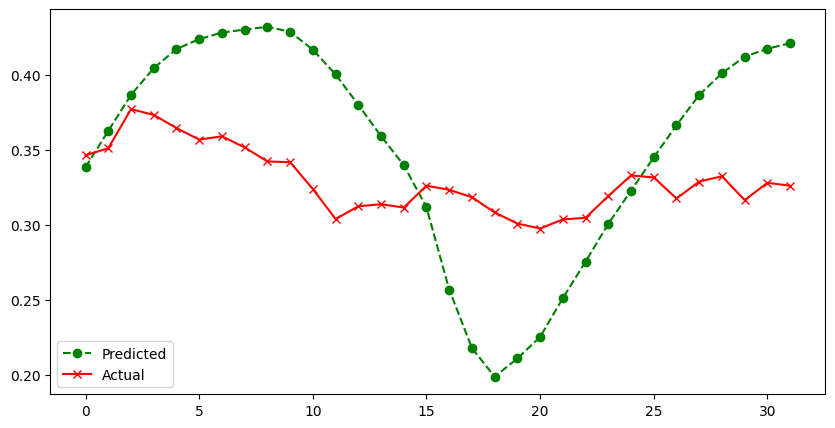

In [24]:
_, ax = plt.subplots(figsize=(10, 5))
ax.plot(range(32),
        predicted_batch_7,
        color='green',  marker='o', linestyle='dashed', label='Predicted')

ax.plot(range(32),
        val_gen[7][1],
        color='red', label='Actual', marker='x')
ax.legend()

plt.show()

### Predicting more than one patch

In [25]:
predicted = []
actual = []
for i in range(32):
    predicted.extend(model.predict(val_gen[i][0]))
    actual.extend(val_gen[i][1])

1/1 [==============================] - 0s 18ms/step


In [26]:
print('Testing Loss= ', np.mean(tf.keras.losses.MSE(actual, predicted)))

Testing Loss=  0.021069098


### Plotting the validation set output vs the predicted value

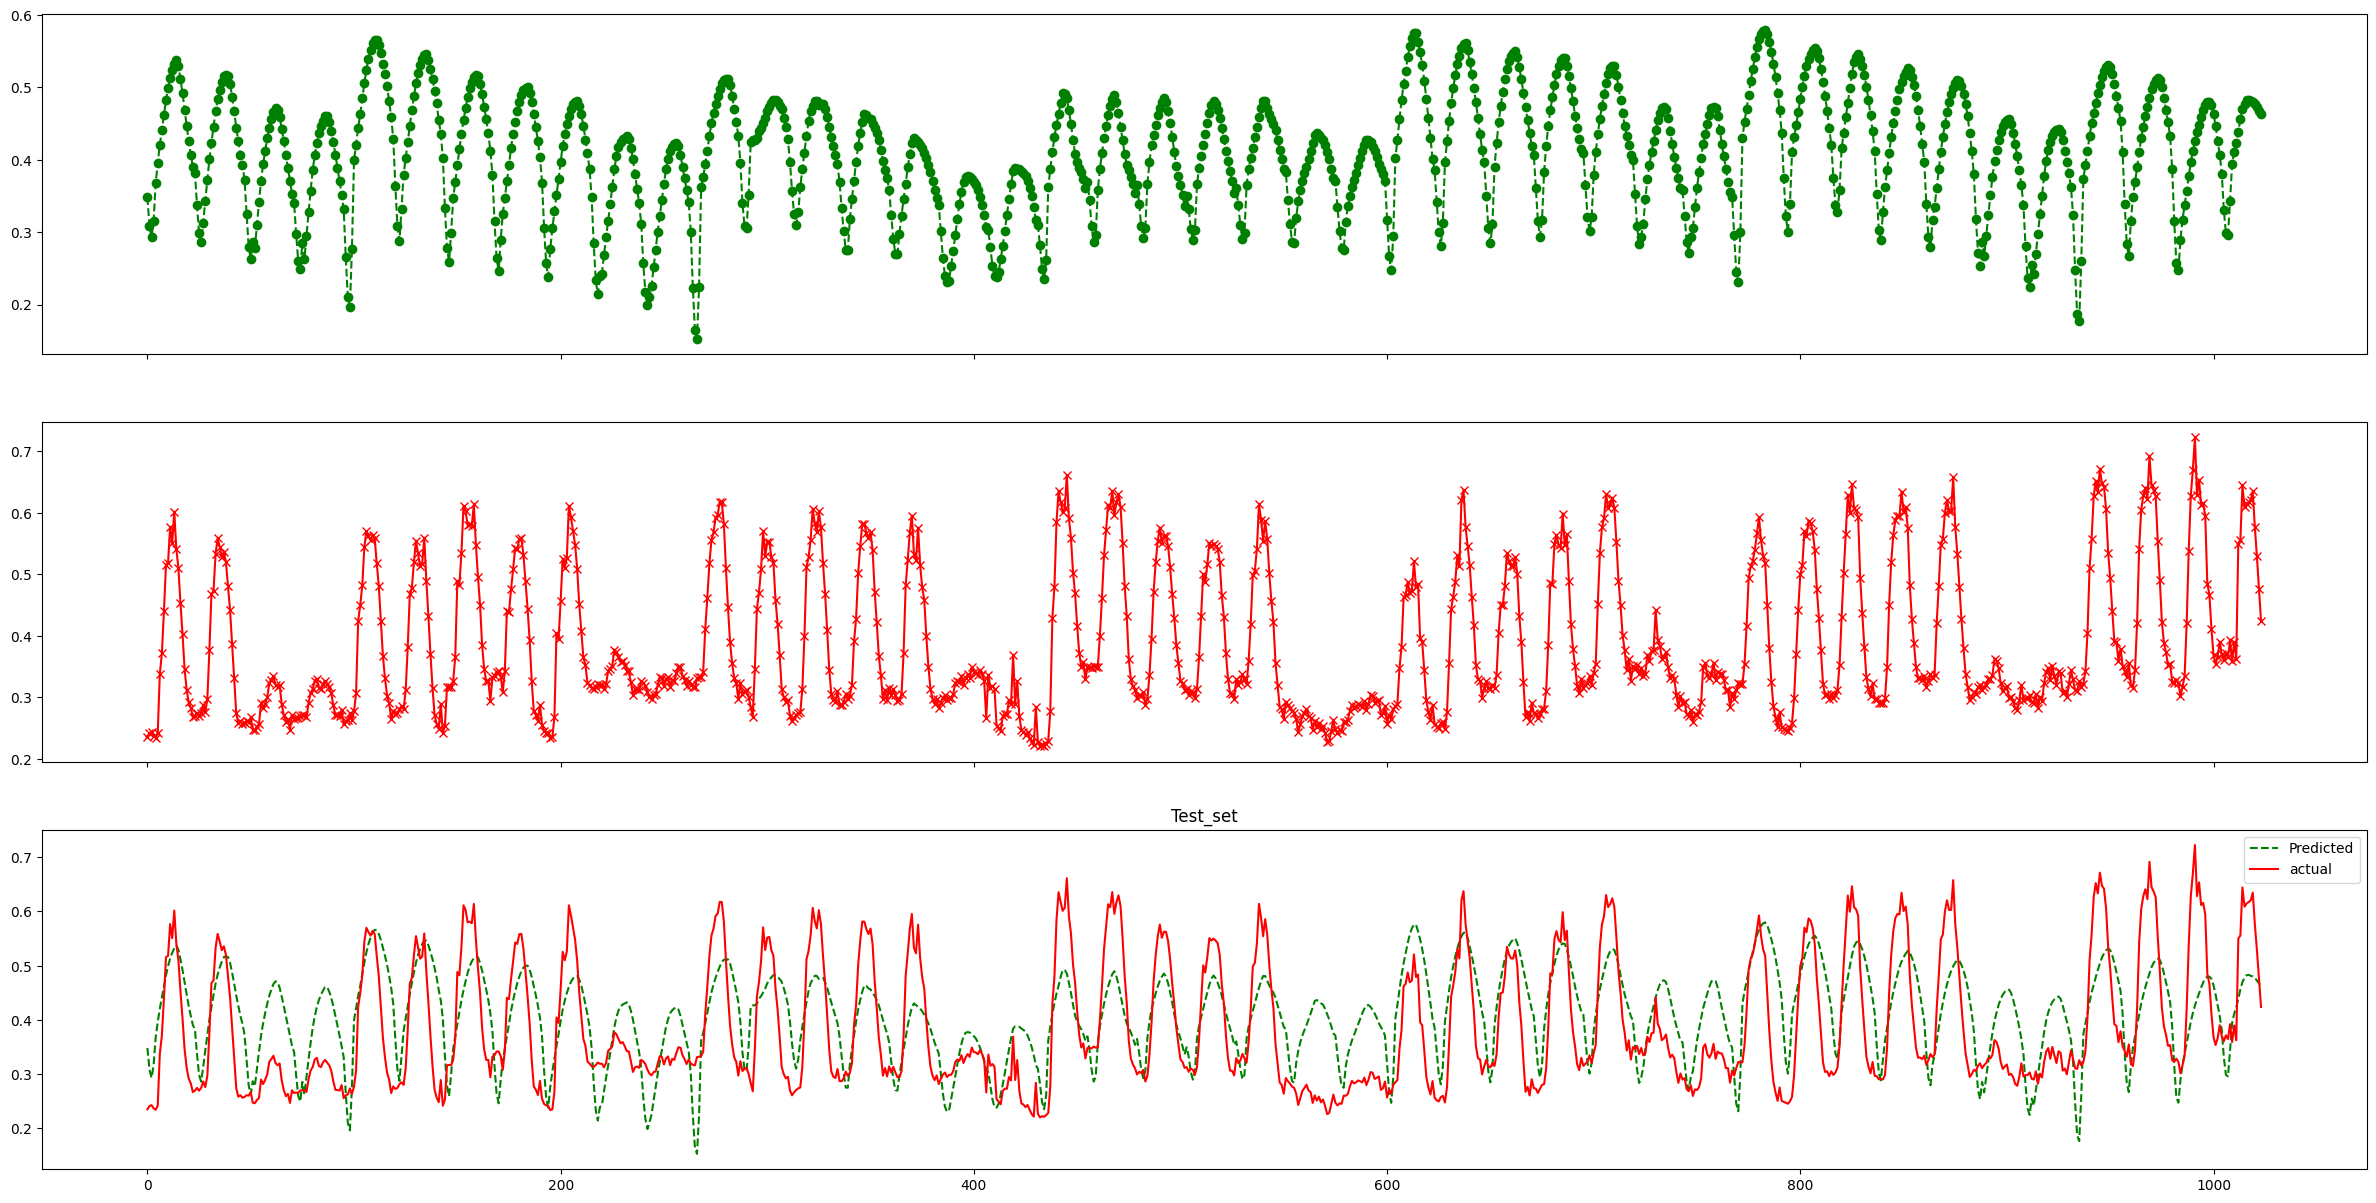

In [27]:
fig, (ax1, ax2, ax) = plt.subplots(3, 1,  figsize=(30, 15), sharex=True)

ax1.plot(range(len(actual)),
         predicted,
         color='green', marker='o', linestyle='dashed', label='Predicted')
plt.legend()

ax2.plot(range(len(actual)),
         actual,
         color='red', marker='x', label='Actual')
plt.legend()

ax.plot(range(len(actual)),
        predicted,
        color='green', linestyle='dashed',
        label='Predicted')
plt.legend()
ax.plot(range(len(actual)),
        actual,
        color='red',
        label='actual')

plt.legend()

plt.title('Test_set', loc='center')

plt.show()

### Effect on the Training Data


In [28]:
actual_t = []
predicted_t = []
for i in range(32):
    predicted_t.extend(model.predict(train_gen[i][0]))
    actual_t.extend(train_gen[i][1])

1/1 [==============================] - 0s 17ms/step


### Plotting the Result

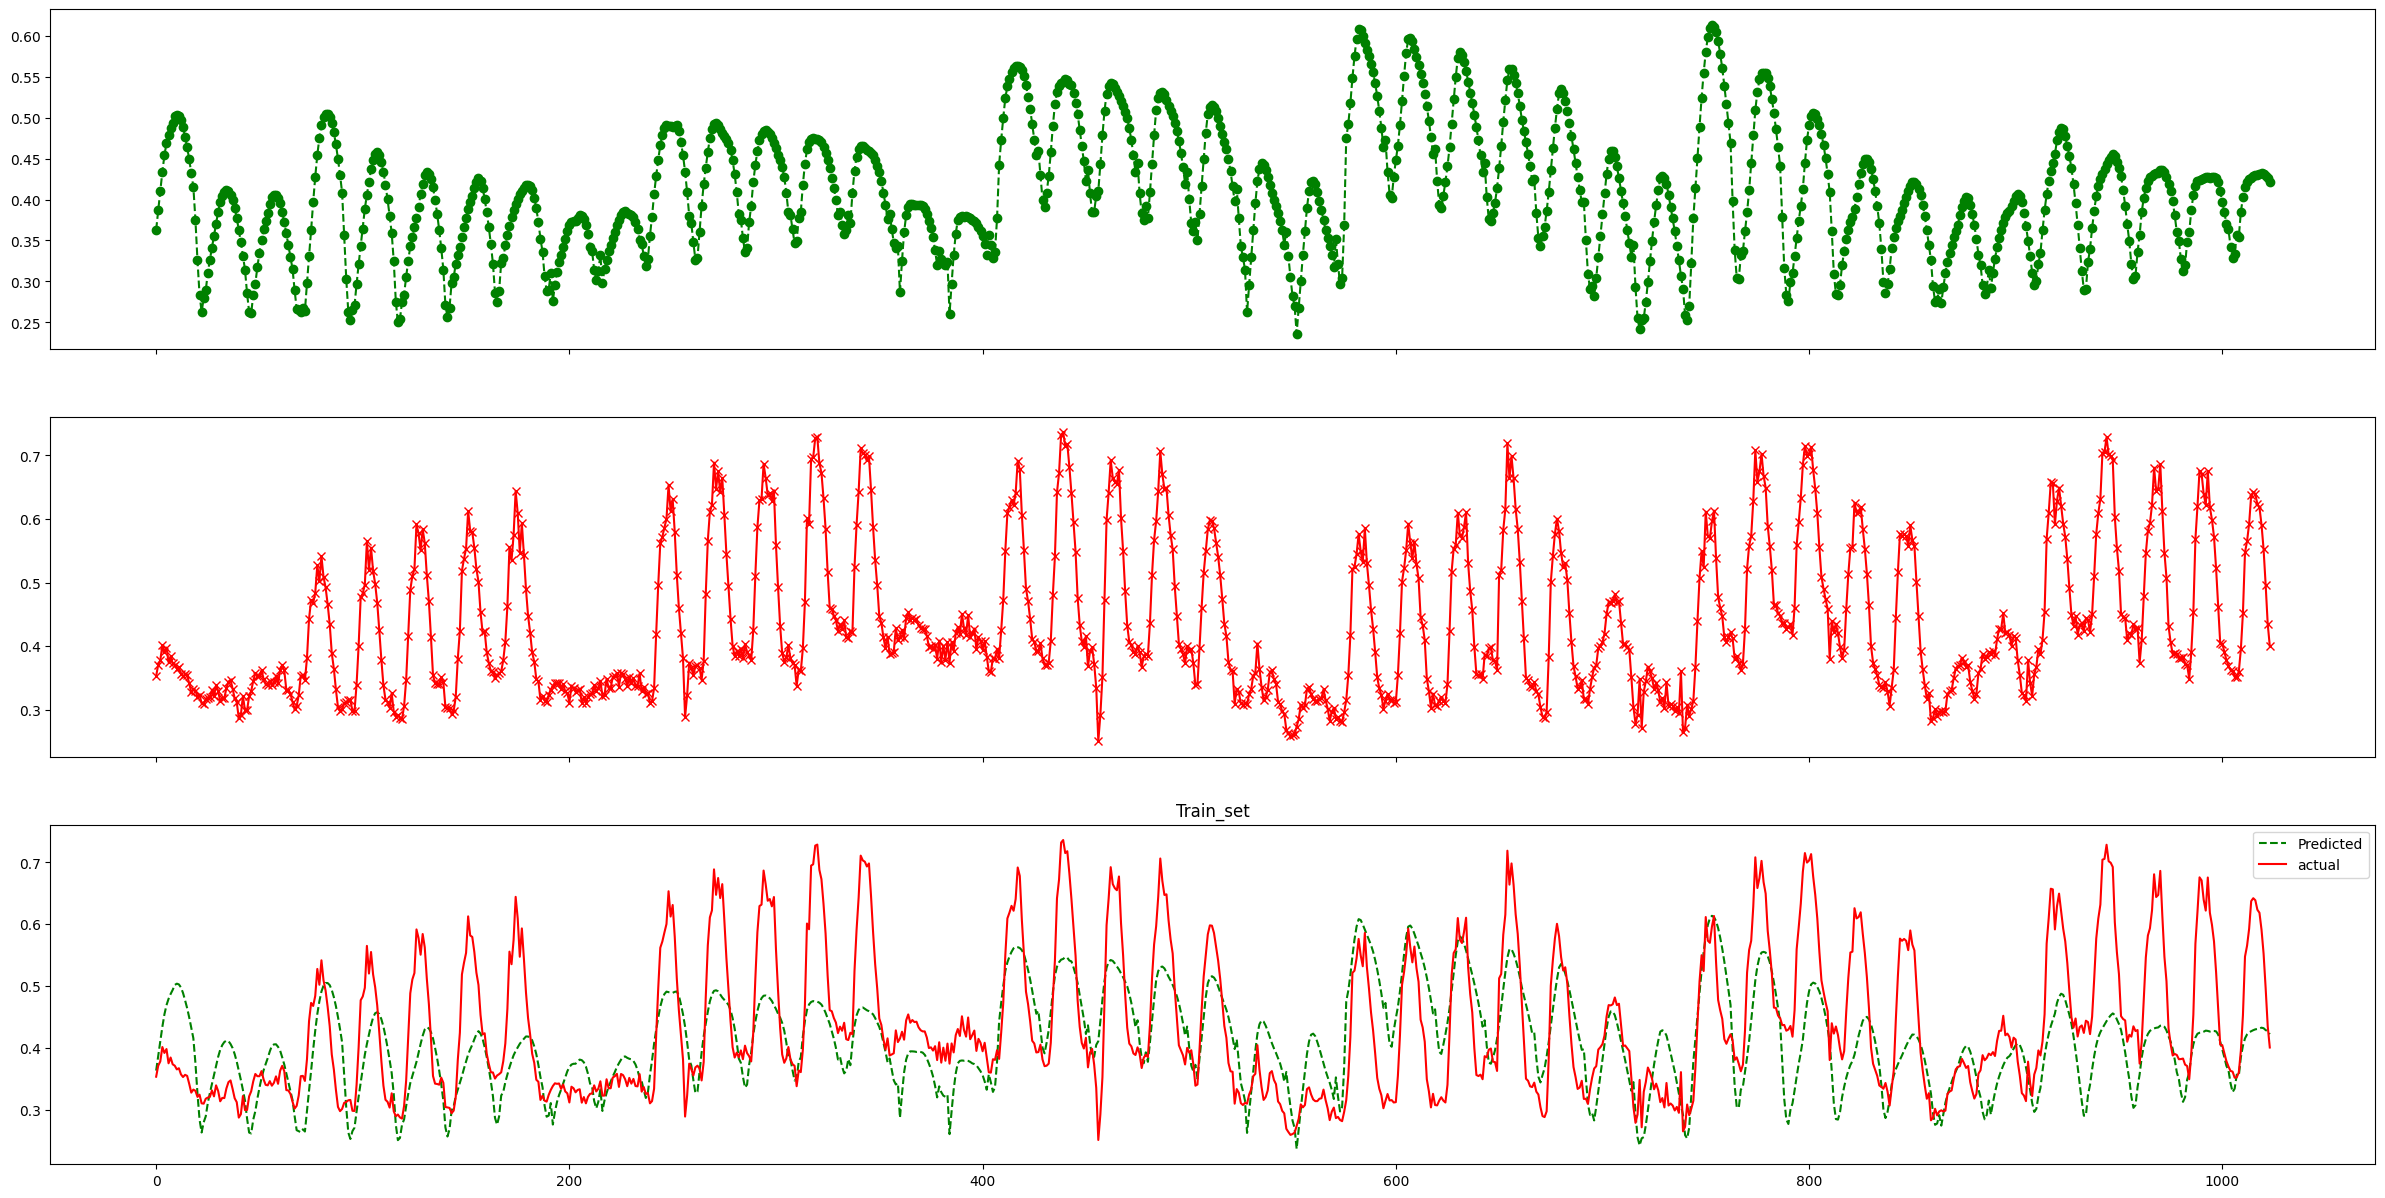

In [29]:
fig, (ax1, ax2, ax) = plt.subplots(3, 1,  figsize=(30, 15), sharex=True)

ax1.plot(range(len(actual_t)),
         predicted_t,
         color='green', marker='o', linestyle='dashed',
         label='Predicted')

ax2.plot(range(len(actual_t)),
         actual_t,
         color='red', marker='x', label='Actual')


ax.plot(range(len(actual_t)),
        predicted_t,
        color='green', linestyle='dashed',
        label='Predicted')

ax.plot(range(len(actual_t)),
        actual_t,
        color='red',
        label='actual')
plt.title('Train_set', loc='center')

plt.legend()

plt.show()

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, None, 128)         54528     
                                                                 
 gru_3 (GRU)                 (None, 32)                15552     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 70,113
Trainable params: 70,113
Non-trainable params: 0
_________________________________________________________________
